In [113]:
# Import needed module
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm
%matplotlib notebook
%matplotlib inline

In [114]:
# Import necesary files
import Environment as Env
from Agent.MC import mc_control
from Agent.SARSA import sarsa_control
from Agent.LFA import lfa_control
from helper import epsilon_greedy, phi, calculate_Q
import vis as display

# 1. Implementation of Easy21 Environment


In [45]:
env = Env.Easy21()
Action = env.random_action()
env.step(Action)

(array([0, 0]), -1, True)

In [46]:
type(Action)

numpy.int32

In [47]:
def sanity_check(no_episode, env):
    win = []
    lost = []
    draw = []
    action_taken = []
    
    for episode in range(no_episode):
        sample_state = env.reset()
        while True:
            print('This is initial state:', sample_state)
            Action = env.random_action()
            action_taken.append(Action)
            next_state, R, done = env.step(Action)
            print('This is the next state:', next_state)
            #done = next_state[2]
            if done:
                print('End game! Reward!', R)
                if R > 0:
                    win.append(R)
                    print('You won :)\n')
                    
                elif R == 0:
                    draw.append(R)
                    print('Draw game :|\n')
                else:
                    lost.append(R)
                    print('You lost :(\n')
                break
    
    return win, lost, draw, action_taken
    
                

In [48]:
n = eval(input('Number of episode as interger: '))
win, lost, draw, action_taken = sanity_check(n, env)

Number of episode as interger: 1000
This is initial state: [1 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [4 2]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [9 9]
This is the next state: [9 8]
This is initial state: [9 9]
This is the next state: [ 9 11]
This is initial state: [9 9]
This is the next state: [ 9 17]
This is initial state: [9 9]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [9 1]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [7 1]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [5 1]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [6 7]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [6 1]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [ 5 10]
This is the 


This is initial state: [10  6]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [10  5]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [ 9 10]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [7 5]
This is the next state: [ 7 14]
This is initial state: [7 5]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [2 9]
This is the next state: [ 2 17]
This is initial state: [2 9]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [4 3]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [6 3]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [8 6]
This is the next state: [8 7]
This is initial state: [8 6]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [1 5]
This is the next state: [0 0]
End game! Rewar

This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [ 7 10]
This is the next state: [7 2]
This is initial state: [ 7 10]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [ 7 10]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [2 6]
This is the next state: [2 5]
This is initial state: [2 6]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [9 3]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [ 3 10]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [3 8]
This is the next state: [ 3 11]
This is initial state: [3 8]
This is the next state: [3 3]
This is initial state: [3 8]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [6 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [7 4]
This is the ne

This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [6 8]
This is the next state: [ 6 15]
This is initial state: [6 8]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [10  8]
This is the next state: [10  4]
This is initial state: [10  8]
This is the next state: [10 13]
This is initial state: [10  8]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [1 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [8 2]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [5 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [8 8]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [6 7]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [5 3]
This is the next state: [ 5 11]
This is initial state: [5 3]
This is the ne

This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [6 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [4 8]
This is the next state: [4 9]
This is initial state: [4 8]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [5 3]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [9 5]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [10  7]
This is the next state: [10 15]
This is initial state: [10  7]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [5 9]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [3 8]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [9 3]
This is the next state: [9 9]
This is initial state: [9 3]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial s

This is initial state: [9 2]
This is the next state: [ 9 14]
This is initial state: [9 2]
This is the next state: [ 9 20]
This is initial state: [9 2]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [1 4]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [7 9]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [10  8]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [3 4]
This is the next state: [0 0]
End game! Reward! 
You lost :(

This is initial state: [5 8]
This is the next state: [0 0]
End game! Reward! 1
You won :)

This is initial state: [1 1]
This is the next state: [ 1 11]
This is initial state: [1 1]
This is the next state: [0 0]
End game! Reward! -1
You lost :(

This is initial state: [1 2]
This is the next state: [1 4]
This is initial state: [1 2]
This is the next state: [ 1 10]
This is initial state: [1 2]
This is the next st

In [49]:
action_string = []
for i in action_taken:
    if i == 1:
        action_string.append('Hit')
    else:
        action_string.append('Stick')

In [50]:
def plot_func(w, l, dr, Act_t): 
    plt.figure(figsize=(10,10))
    plt.hist(w, label='win')
    plt.hist(l, label='lost')
    plt.hist(dr, label='draw')
    plt.hist(Act_t, label='action_taken')
    plt.gca().set(title='Win, Lost, draw and action taken for game played 1k times', ylabel='Number of game Played')
    plt.legend()
    plt.savefig('randomly_playing for 1k times.png')
    plt.show()

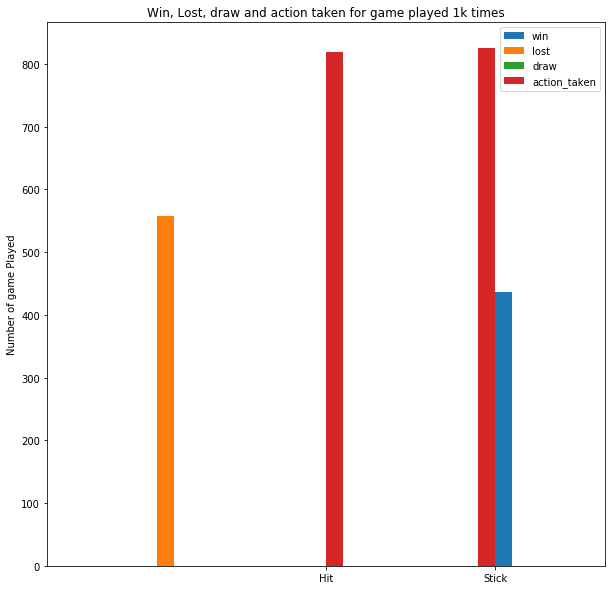

In [51]:
plot_func(win, lost, draw, action_string)

In [52]:
n_hit = action_taken.count(1) # can change this to 'Hit'
n_stick = action_taken.count(0) # can change this to 'Stick'

In [55]:
# action_taken

In [56]:
n_hit, n_stick

(818, 825)

In [57]:
n_win = win.count(1)
n_lost = lost.count(-1)

In [58]:
n_win, n_lost

(437, 558)

In [59]:
p_win = n_win/n
p_win

0.437

In [60]:
p_lost = n_lost/n
p_lost

0.558

# 3.	Monte-Carlo Control in Easy21.

In [28]:
# Q_50k, V_50k = mc_control(100, 50000)

Episode 50000/50000.

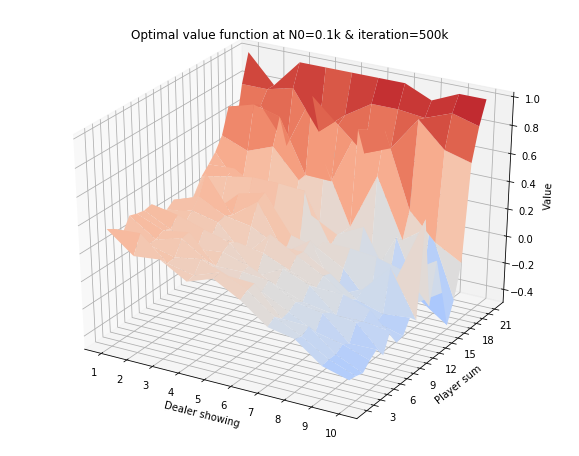

In [29]:
# display.plot_easy21_value(V_50k, 'Optimal value function at N0=0.1k & iteration=500k', 3)
# # plt.savefig('V_100.png')

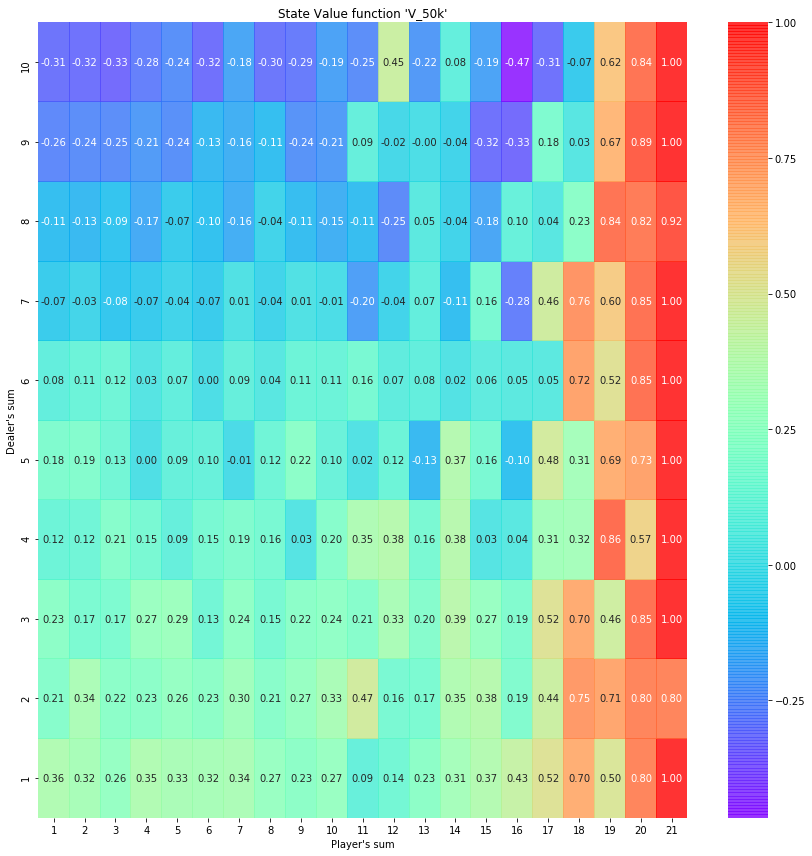

In [30]:
# fig, ax = plt.subplots(figsize=(12, 12))
# display.plot_heatmap(V_50k, ax=ax, title="State Value function 'V_50k'")
# fig.tight_layout()

In [31]:
# Q_100k, V_100k = mc_control(1000, 100000)

Episode 100000/100000.

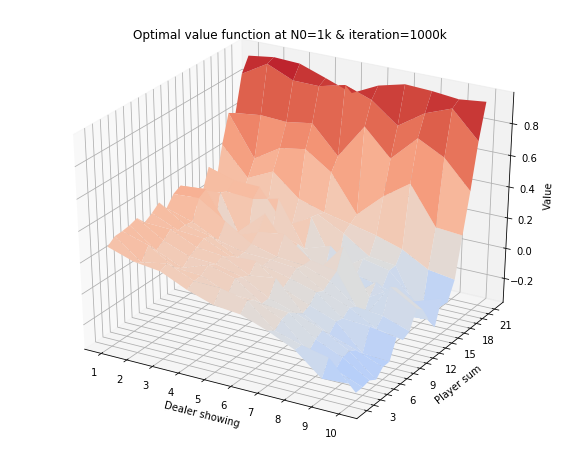

In [32]:
# display.plot_easy21_value(V_100k, 'Optimal value function at N0=1k & iteration=1000k', 2)

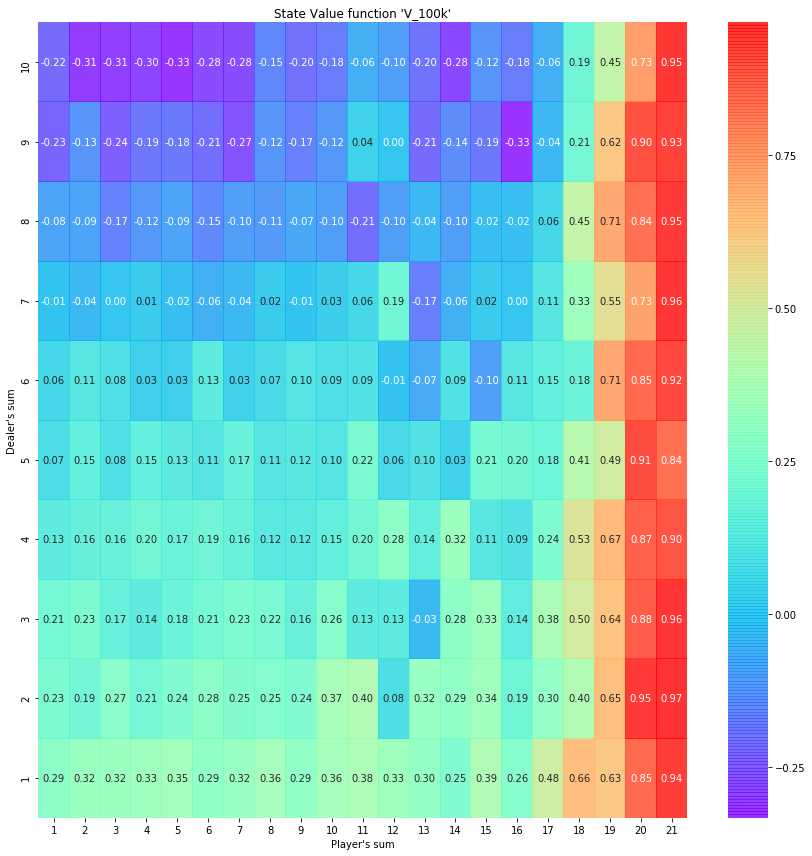

In [33]:
# fig, ax = plt.subplots(figsize=(12, 12))
# display.plot_heatmap(V_100k, ax=ax, title="State Value function 'V_100k'")
# fig.tight_layout()

In [34]:
Q_1000k, V_1000k = mc_control(10000, 1000000)


Episode 1000000/1000000.

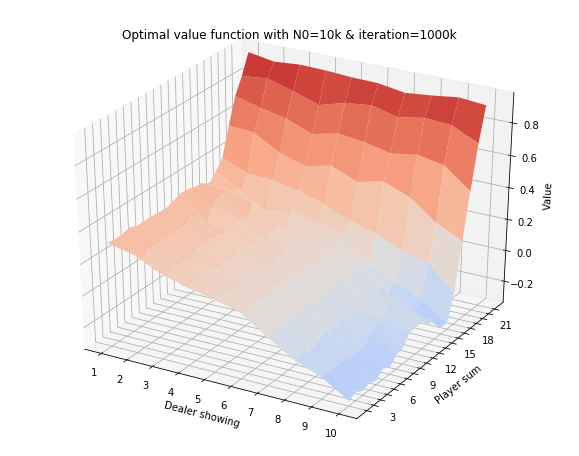

In [35]:
display.plot_easy21_value(V_1000k, 'Optimal value function with N0=10k & iteration=1000k',1)

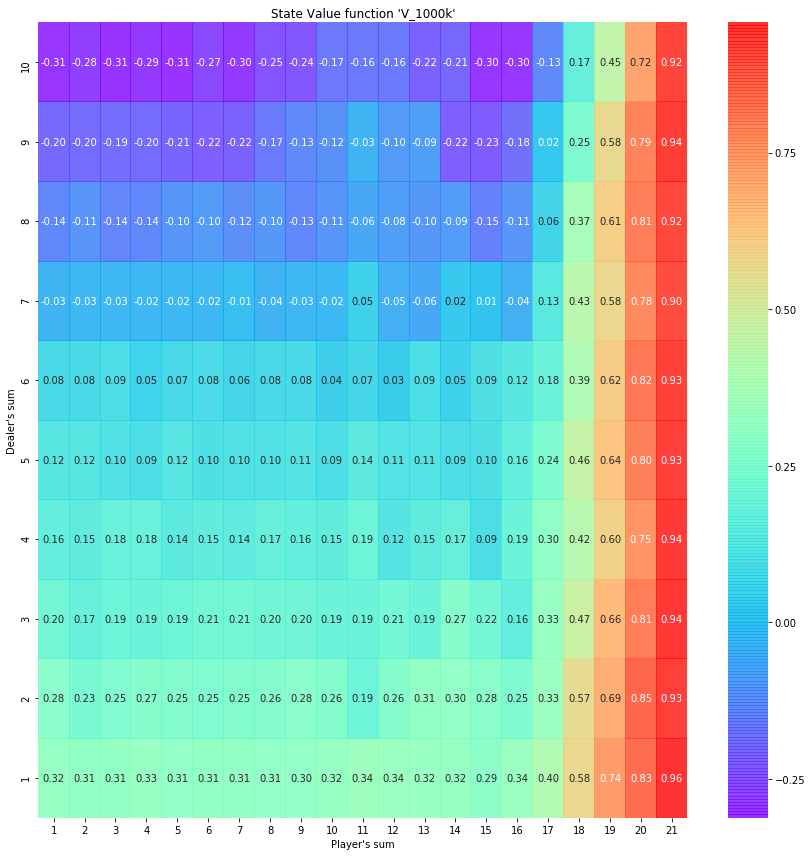

In [36]:
fig, ax = plt.subplots(figsize=(12, 12))
display.plot_heatmap(V_1000k, ax=ax, title="State Value function 'V_1000k'")
fig.tight_layout()

In [63]:
mean_square_error_dict = {}
collect_V_from_sarsa = []
mean_square_error_list = []
for Lambda in tqdm(np.linspace(0,1,11)):
    
    Q, V, mean_square_error = sarsa_control(10000, 1000000,Lambda , Q_1000k) # N0, num_episodes, td_lambda, Q_MC
    Lambda = round(Lambda, 1)
    mean_square_error_dict[Lambda] = mean_square_error
    collect_V_from_sarsa.append(V)
    mean_square_error_list.append(mean_square_error[-1])


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Episode 999000/1000000.


  9%|███████▌                                                                           | 1/11 [01:22<13:43, 82.33s/it]

Episode 999000/1000000.


 18%|███████████████                                                                    | 2/11 [02:44<12:19, 82.19s/it]

Episode 999000/1000000.


 27%|██████████████████████▋                                                            | 3/11 [04:06<10:58, 82.28s/it]

Episode 999000/1000000.


 36%|██████████████████████████████▏                                                    | 4/11 [05:28<09:35, 82.22s/it]

Episode 999000/1000000.


 45%|█████████████████████████████████████▋                                             | 5/11 [06:50<08:12, 82.13s/it]

Episode 999000/1000000.


 55%|█████████████████████████████████████████████▎                                     | 6/11 [08:15<06:52, 82.56s/it]

Episode 999000/1000000.


 64%|████████████████████████████████████████████████████▊                              | 7/11 [09:37<05:30, 82.50s/it]

Episode 999000/1000000.


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [10:58<04:06, 82.32s/it]

Episode 999000/1000000.


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [12:20<02:44, 82.28s/it]

Episode 999000/1000000.


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [13:43<01:22, 82.31s/it]

Episode 999000/1000000.


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [15:05<00:00, 82.29s/it]


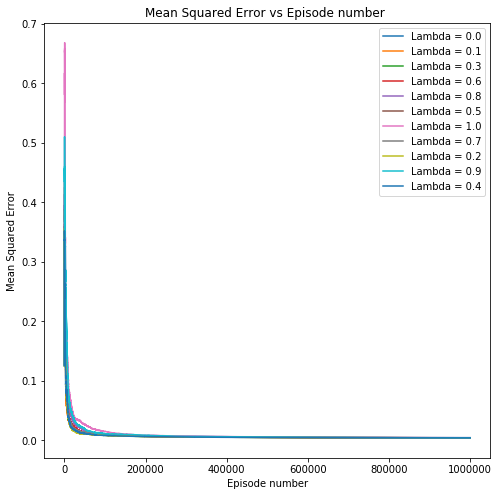

<Figure size 432x288 with 0 Axes>

In [111]:
plt.figure(figsize=(8,8))
for key in mean_square_error_dict.keys():
    if key * 100 % 2 == 0: 
        plt.plot(mean_square_error_dict[key], label="Lambda = " + str(key))
    

plt.title('Mean Squared Error vs Episode number ')
plt.xlabel('Episode number')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.autoscale()
plt.show()
plt.savefig('MSE vs Episode number.png')

No handles with labels found to put in legend.


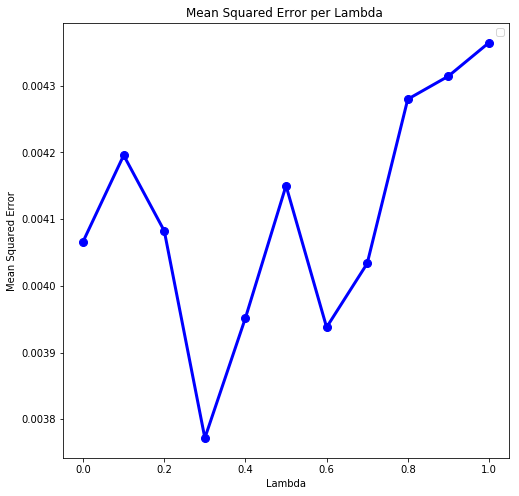

<Figure size 432x288 with 0 Axes>

In [109]:
plt.figure(figsize=(8,8))
plt.plot(np.linspace(0,1,11), mean_square_error_list, color='blue', linewidth=3, marker='o', markersize=8)
plt.title('Mean Squared Error per Lambda ')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.autoscale()
plt.show()
plt.savefig('Mean Squared Error per Lambda.png')

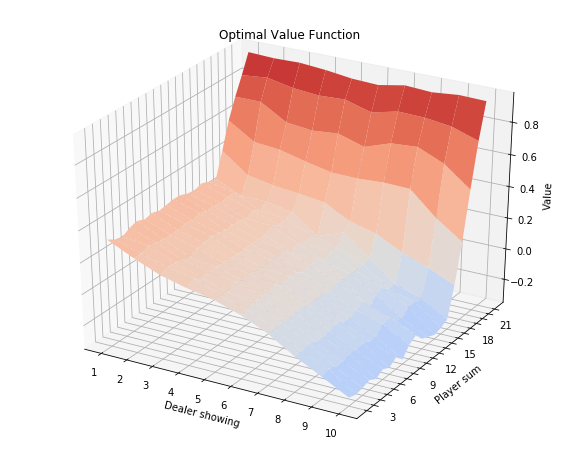

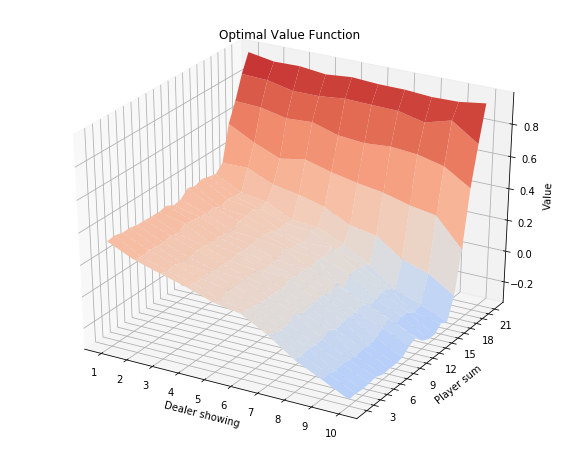

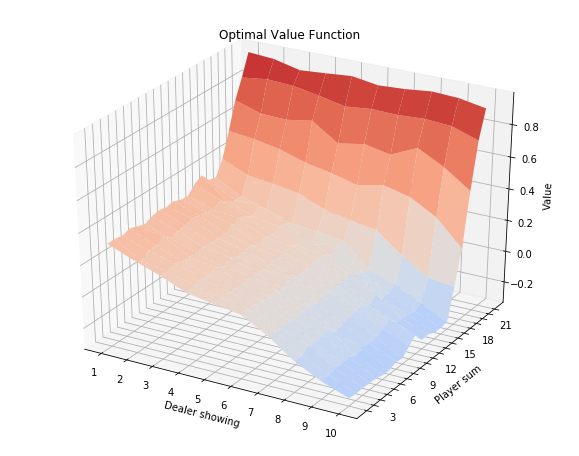

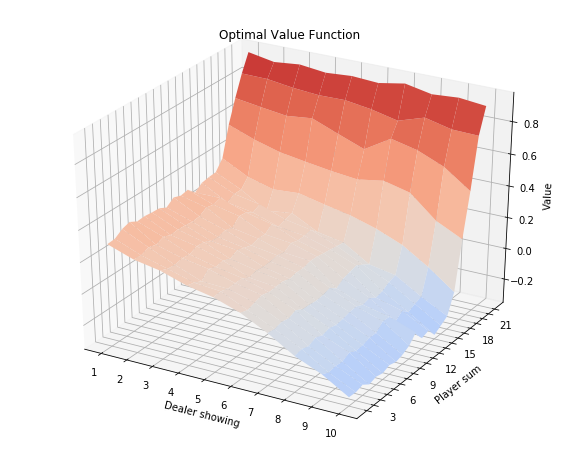

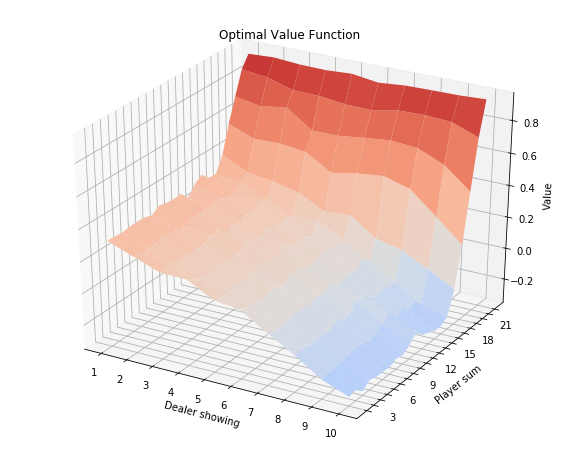

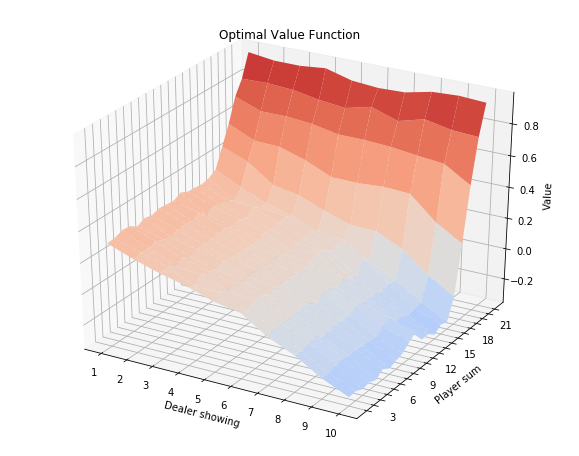

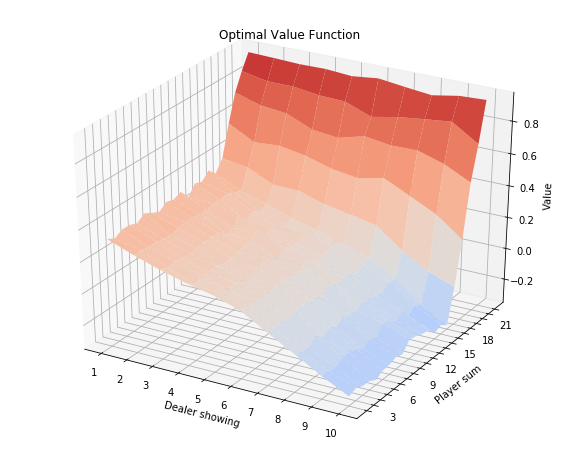

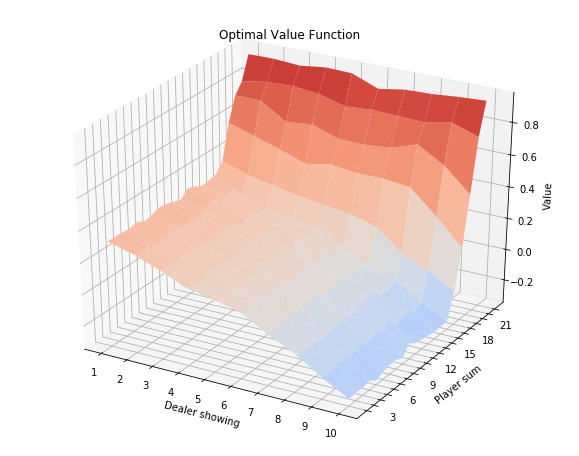

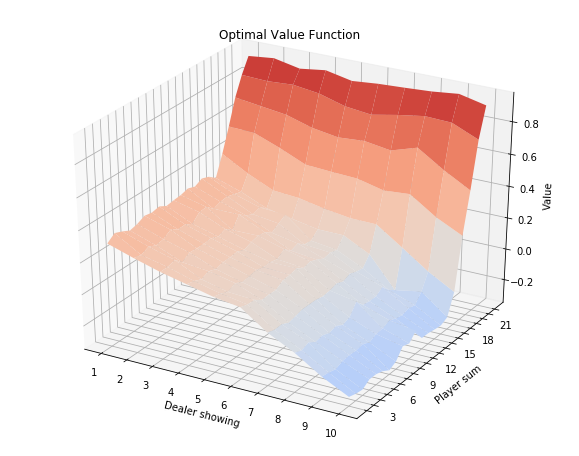

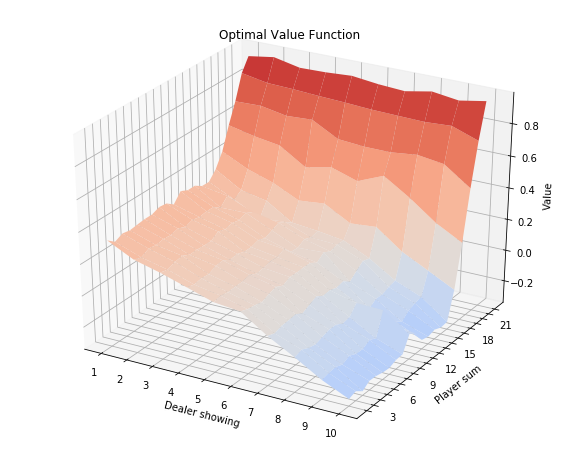

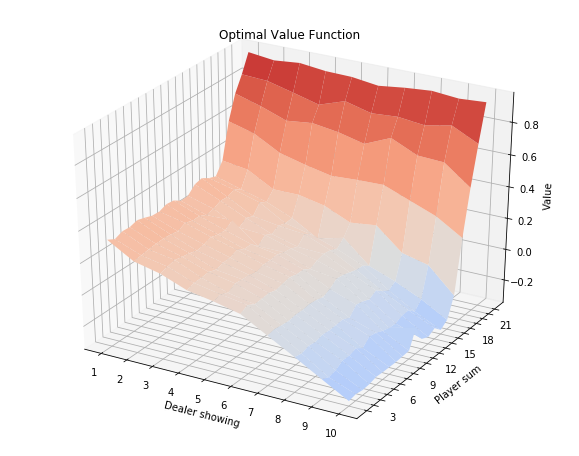

In [117]:
for Vf in collect_V_from_sarsa:
    display.plot_easy21_value(Vf, 'Optimal Value Function')

## Linear Function Approximation in Easy21

In [125]:
mean_square_error_lfa_dict = {}
collect_V_from_lfa = {}
mean_square_error_lfa_list = []
for Lambda_lfa in tqdm(np.linspace(0,1,11)):
    
    Q_lfa, V_lfa, mean_square_error_lfa = lfa_control(10000, Lambda_lfa , Q_1000k) # N0, num_episodes, td_lambda, Q_MC
    mean_square_error_lfa_dict[Lambda_lfa] = mean_square_error_lfa
    collect_V_from_lfa[Lambda_lfa] = V_lfa
    mean_square_error_lfa_list.append(mean_square_error_lfa[-1])




  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

Episode 10000/10000.




  9%|███████▌                                                                           | 1/11 [00:51<08:35, 51.52s/it]

Episode 10000/10000.




 18%|███████████████                                                                    | 2/11 [01:39<07:25, 49.54s/it]

Episode 10000/10000.




 27%|██████████████████████▋                                                            | 3/11 [02:29<06:39, 49.95s/it]

Episode 10000/10000.




 36%|██████████████████████████████▏                                                    | 4/11 [03:31<06:09, 52.77s/it]

Episode 10000/10000.




 45%|█████████████████████████████████████▋                                             | 5/11 [04:28<05:21, 53.61s/it]

Episode 10000/10000.




 55%|█████████████████████████████████████████████▎                                     | 6/11 [05:17<04:24, 52.91s/it]

Episode 10000/10000.




 64%|████████████████████████████████████████████████████▊                              | 7/11 [06:05<03:28, 52.22s/it]

Episode 10000/10000.




 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [06:54<02:35, 51.75s/it]

Episode 10000/10000.




 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [07:43<01:42, 51.47s/it]

Episode 10000/10000.




 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [08:31<00:51, 51.13s/it]

Episode 10000/10000.




100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [09:19<00:00, 50.86s/it]




In [126]:
[*collect_V_from_lfa]

[0.0,
 0.1,
 0.8,
 0.30000000000000004,
 1.0,
 0.9,
 0.2,
 0.6000000000000001,
 0.7000000000000001,
 0.4,
 0.5]

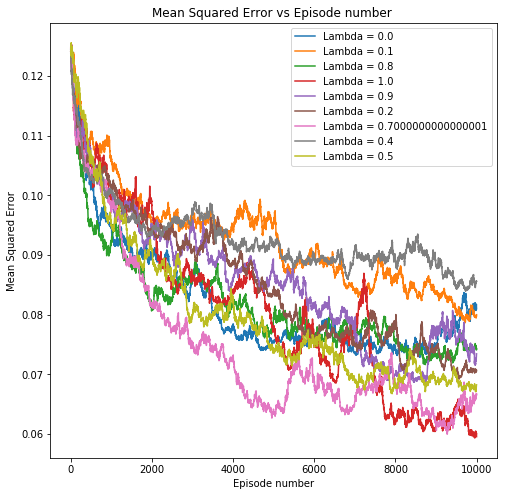

<Figure size 432x288 with 0 Axes>

In [128]:
plt.figure(figsize=(8,8))
for key in mean_square_error_lfa_dict.keys():
    if key * 100 % 2 == 0: 
        plt.plot(mean_square_error_lfa_dict[key], label="Lambda = " + str(key))
    

plt.title('Mean Squared Error vs Episode number ')
plt.xlabel('Episode number')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.autoscale()
plt.show()
plt.savefig('MSE vs Episode number lfa.png')

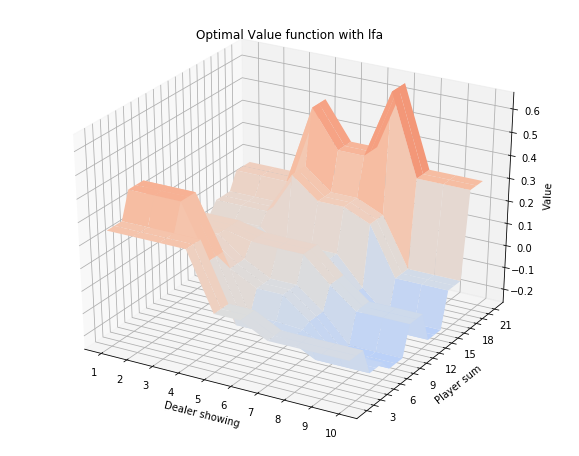

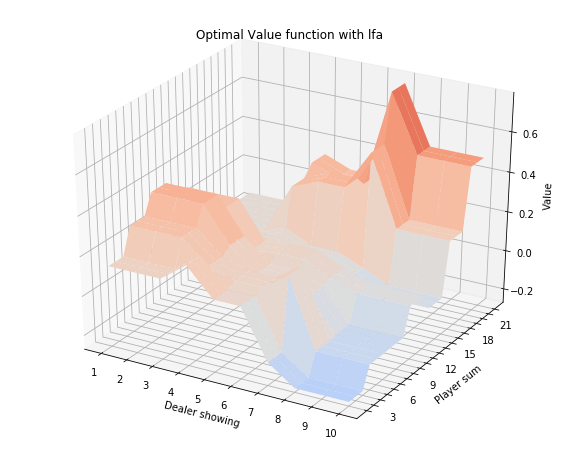

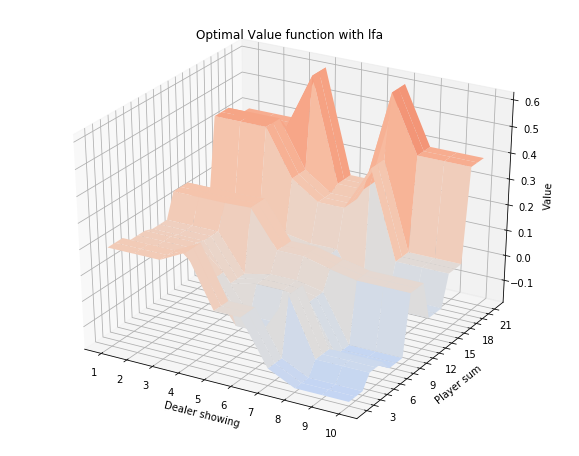

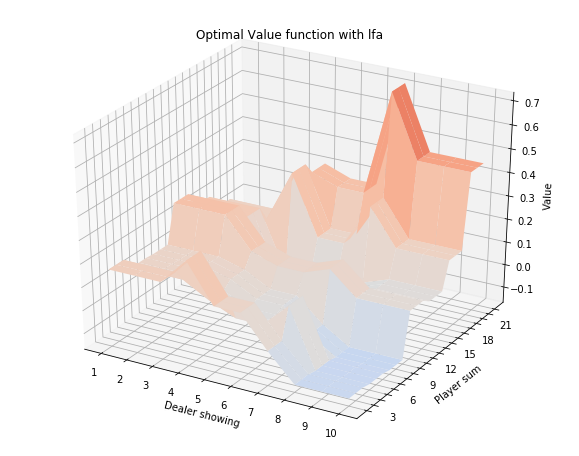

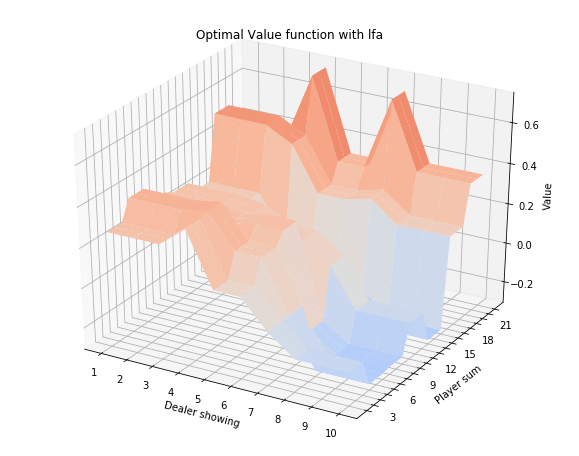

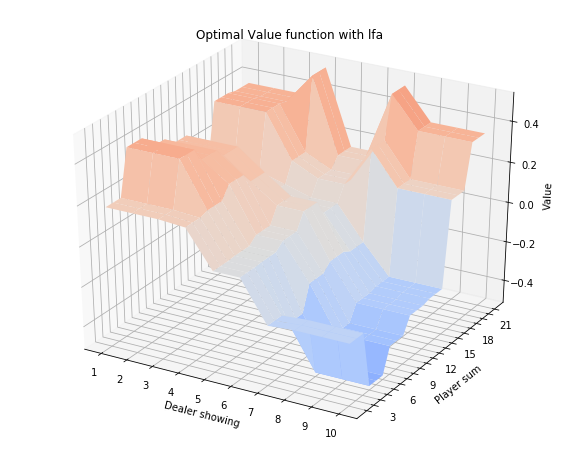

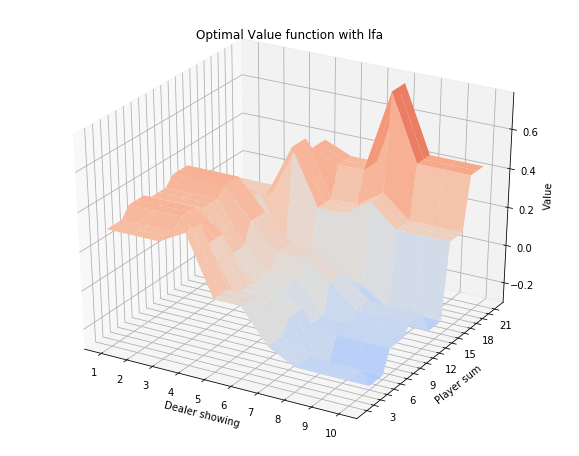

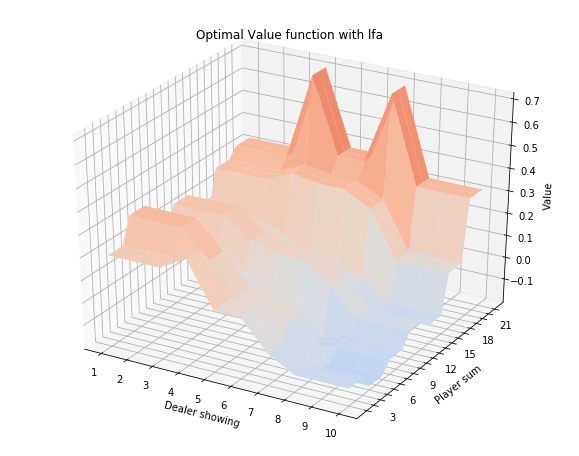

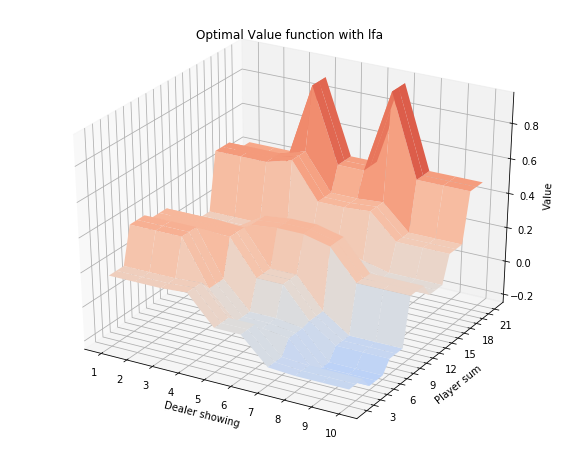

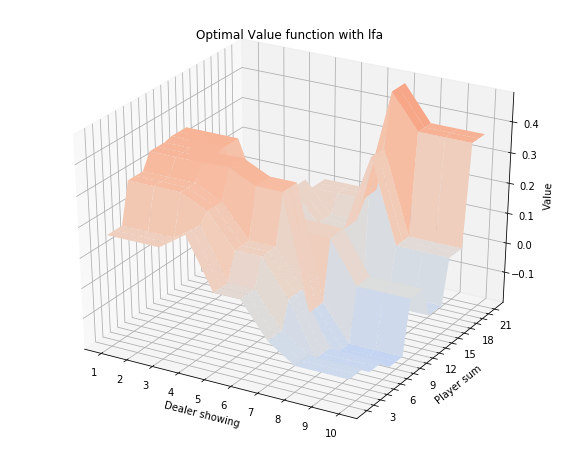

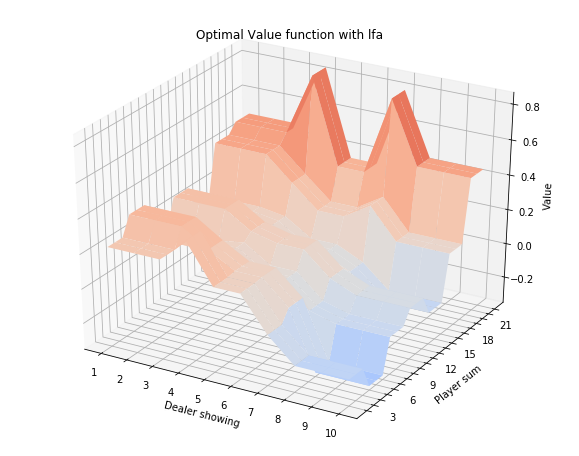

In [127]:
for key, value in collect_V_from_lfa.items():
    display.plot_easy21_value(collect_V_from_lfa[key], 'Optimal Value function with lfa')

No handles with labels found to put in legend.


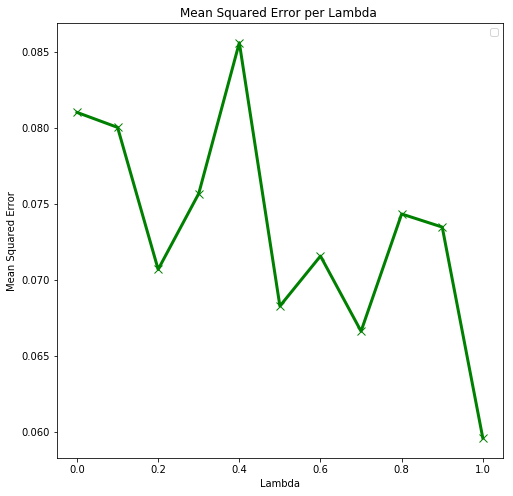

<Figure size 432x288 with 0 Axes>

In [129]:
plt.figure(figsize=(8,8))
plt.plot(np.linspace(0,1,11), mean_square_error_lfa_list, color='green', linewidth=3, marker='x', markersize=8)
plt.title('Mean Squared Error per Lambda ')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.autoscale()
plt.show()
plt.savefig('Mean Squared Error per Lambda lfa.png')